In [15]:
import os
import pandas as pd

# Directories for team and player stats
team_stats_dir = "/Users/luko90s/Desktop/My_Projects/Machine-Learning-and-Insights-for-La-Liga-2023-24/FIFA_datasets/laliga2023_34/team_stats"
player_stats_dir = "/Users/luko90s/Desktop/My_Projects/Machine-Learning-and-Insights-for-La-Liga-2023-24/FIFA_datasets/laliga2023_34/player_stats"

# Function to load and merge CSV files
def load_and_merge_csvs(directory, merge_on, suffixes=("_left", "_right")):
    merged_data = None
    for file in os.listdir(directory):
        if file.endswith(".csv"):
            file_path = os.path.join(directory, file)
            try:
                # Load CSV into a DataFrame
                df = pd.read_csv(file_path)
                print(f"Loaded file: {file}")  # Track progress

                # Drop duplicate columns before merging
                if merged_data is not None:
                    common_cols = set(merged_data.columns) & set(df.columns) - set(merge_on)
                    if common_cols:
                        print(f"Dropping duplicate columns: {common_cols}")
                        df = df.drop(columns=list(common_cols))
                
                # Merge with the cumulative DataFrame
                if merged_data is None:
                    merged_data = df
                else:
                    merged_data = pd.merge(
                        merged_data, df, on=merge_on, how="outer", suffixes=suffixes
                    )
            except Exception as e:
                print(f"Error loading {file}: {e}")
    return merged_data

# Load and merge all team stats
team_data = load_and_merge_csvs(team_stats_dir, merge_on=["Team"])

# Load and merge all player stats
player_data = load_and_merge_csvs(player_stats_dir, merge_on=["Player", "Team"])

# Save the resulting merged DataFrames
if team_data is not None:
    team_data.to_csv("/Users/luko90s/Desktop/My_Projects/Machine-Learning-and-Insights-for-La-Liga-2023-24/FIFA_datasets/merged_team_data.csv", index=False)
    print("Merged team data saved as 'merged_team_data.csv'")
if player_data is not None:
    player_data.to_csv("/Users/luko90s/Desktop/My_Projects/Machine-Learning-and-Insights-for-La-Liga-2023-24/FIFA_datasets/merged_player_data.csv", index=False)
    print("Merged player data saved as 'merged_player_data.csv'")


Loaded file: expected_goals_conceded_team.csv
Loaded file: fk_foul_lost_team.csv
Dropping duplicate columns: {'Matches', 'Country', 'Rank'}
Loaded file: clean_sheet_team.csv
Dropping duplicate columns: {'Matches', 'Country', 'Rank'}
Loaded file: big_chance_team.csv
Dropping duplicate columns: {'Matches', 'Country', 'Rank'}
Loaded file: total_red_card_team.csv
Dropping duplicate columns: {'Matches', 'Country', 'Yellow Cards', 'Rank'}
Loaded file: saves_team.csv
Dropping duplicate columns: {'Matches', 'Country', 'Rank'}
Loaded file: interception_team.csv
Dropping duplicate columns: {'Matches', 'Country', 'Rank'}
Loaded file: penalty_won_team.csv
Dropping duplicate columns: {'Matches', 'Country', 'Rank'}
Loaded file: accurate_long_balls_team.csv
Dropping duplicate columns: {'Matches', 'Country', 'Rank'}
Loaded file: team_goals_per_match.csv
Dropping duplicate columns: {'Matches', 'Country', 'Rank'}
Loaded file: Laliga_table_home_2023_24.csv
Error loading Laliga_table_home_2023_24.csv: 'Te

In [16]:
# Reload the merged files
team_data = pd.read_csv("/Users/luko90s/Desktop/My_Projects/Machine-Learning-and-Insights-for-La-Liga-2023-24/FIFA_datasets/merged_team_data.csv")
player_data = pd.read_csv("/Users/luko90s/Desktop/My_Projects/Machine-Learning-and-Insights-for-La-Liga-2023-24/FIFA_datasets/merged_player_data.csv")

# Check for duplicate columns and remove them
team_data = team_data.loc[:, ~team_data.columns.duplicated()]
player_data = player_data.loc[:, ~player_data.columns.duplicated()]

# Save cleaned files
team_data.to_csv("cleaned_team_data.csv", index=False)
player_data.to_csv("cleaned_player_data.csv", index=False)


In [17]:
team_data.head(21)

,Rank,Team,Expected Goals Conceded,Goals Conceded,Matches,Country,Fouls per Match,Yellow Cards,Clean Sheets,Big Chances,...,Total Goals Conceded,Accurate Passes per Match,Pass Success (%),Stadium Name,City,Latitude,Longitude,Capacity,FotMob Team Rating,Touches in Opposition Box
0,2.0,Almeria,62.1,75.0,38.0,ESP,12.6,85.0,6.0,89.0,...,75.0,311.1,79.4,Estadio de los Juegos Mediterraneos,Almeria,36.8496,-2.4381,15000,6.61,653.0
1,18.0,Athletic Club,41.9,37.0,38.0,ESP,13.4,75.0,18.0,93.0,...,37.0,352.5,79.6,San Mames,Bilbao,43.2641,-2.9494,53289,6.90,953.0
2,19.0,Atletico Madrid,39.8,43.0,38.0,ESP,11.5,82.0,13.0,121.0,...,43.0,425.3,84.6,Wanda Metropolitano,Madrid,40.4362,-3.5994,68456,6.97,1012.0
3,16.0,Barcelona,42.0,44.0,38.0,ESP,10.8,85.0,17.0,127.0,...,44.0,539.5,88.6,Camp Nou,Barcelona,41.3809,2.1228,99354,7.10,1177.0
4,9.0,Cadiz,52.9,55.0,38.0,ESP,15.2,106.0,10.0,58.0,...,55.0,258.8,74.3,Estadio Nuevo Mirandilla,Cadiz,36.5083,-6.2722,20000,6.61,592.0
5,7.0,Celta Vigo,55.1,57.0,38.0,ESP,12.2,62.0,6.0,85.0,...,57.0,340.2,80.2,Balaidos,Vigo,42.2118,-8.7392,29000,6.81,866.0
6,13.0,Deportivo Alaves,45.2,46.0,38.0,ESP,12.7,84.0,11.0,80.0,...,46.0,239.1,73.9,Mendizorrotza,Vitoria-Gasteiz,42.8498,-2.6813,19840,6.78,809.0
7,NaN,Elche,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Estadio Manuel Martinez Valero,Elche,38.2668,-0.6630,31088,NaN,NaN
8,8.0,Getafe,54.4,54.0,38.0,ESP,17.1,126.0,10.0,72.0,...,54.0,257.7,72.6,Coliseum Alfonso Perez,Getafe,40.3250,-3.7146,17393,6.74,734.0
9,6.0,Girona,55.3,46.0,38.0,ESP,10.7,75.0,12.0,131.0,...,46.0,469.8,87.9,Estadi Montilivi,Girona,41.9630,2.8374,13500,7.03,1048.0


In [18]:
team_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 49 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Rank                                20 non-null     float64
 1   Team                                21 non-null     object 
 2   Expected Goals Conceded             20 non-null     float64
 3   Goals Conceded                      20 non-null     float64
 4   Matches                             20 non-null     float64
 5   Country                             20 non-null     object 
 6   Fouls per Match                     20 non-null     float64
 7   Yellow Cards                        20 non-null     float64
 8   Clean Sheets                        20 non-null     float64
 9   Big Chances                         20 non-null     float64
 10  Goals                               20 non-null     float64
 11  Red Cards                           20 non-null

In [19]:
team_data.isnull().sum()

Rank                                  1
Team                                  0
Expected Goals Conceded               1
Goals Conceded                        1
Matches                               1
Country                               1
Fouls per Match                       1
Yellow Cards                          1
Clean Sheets                          1
Big Chances                           1
Goals                                 1
Red Cards                             1
Saves per Match                       1
Total Saves                           1
Interceptions per Match               1
Total Interceptions                   1
Penalties Won                         1
Conversion Rate (%)                   1
Accurate Long Balls per Match         1
Successful Long Balls (%)             1
Goals per Match                       1
Total Goals Scored                    1
Clearances per Match                  1
Total Clearances                      1
Possession (%)                        1


In [20]:
team_data.dropna(inplace=True)

In [21]:
team_data.isnull().sum()

Rank                                  0
Team                                  0
Expected Goals Conceded               0
Goals Conceded                        0
Matches                               0
Country                               0
Fouls per Match                       0
Yellow Cards                          0
Clean Sheets                          0
Big Chances                           0
Goals                                 0
Red Cards                             0
Saves per Match                       0
Total Saves                           0
Interceptions per Match               0
Total Interceptions                   0
Penalties Won                         0
Conversion Rate (%)                   0
Accurate Long Balls per Match         0
Successful Long Balls (%)             0
Goals per Match                       0
Total Goals Scored                    0
Clearances per Match                  0
Total Clearances                      0
Possession (%)                        0


In [22]:
team_data.columns

Index(['Rank', 'Team', 'Expected Goals Conceded', 'Goals Conceded', 'Matches',
       'Country', 'Fouls per Match', 'Yellow Cards', 'Clean Sheets',
       'Big Chances', 'Goals', 'Red Cards', 'Saves per Match', 'Total Saves',
       'Interceptions per Match', 'Total Interceptions', 'Penalties Won',
       'Conversion Rate (%)', 'Accurate Long Balls per Match',
       'Successful Long Balls (%)', 'Goals per Match', 'Total Goals Scored',
       'Clearances per Match', 'Total Clearances', 'Possession (%)',
       'Expected Goals', 'Possession Won Final 3rd per Match',
       'Total Possessions Won', 'Accurate Crosses per Match',
       'Cross Success (%)', 'Successful Tackles per Match',
       'Tackle Success (%)', 'Penalties Conceded', 'Penalty Goals Conceded',
       'Corners Taken', 'Shots on Target per Match',
       'Shot Conversion Rate (%)', 'Big Chances Missed',
       'Goals Conceded per Match', 'Total Goals Conceded',
       'Accurate Passes per Match', 'Pass Success (%)', 'Sta

In [8]:
player_data.head()

,Rank,Player,Team,Shots per 90,Shot Conversion Rate (%),Minutes,Matches,Country,Interceptions per 90,Total Interceptions,...,Total Blocks,Clean Sheets,Goals Conceded,Tackles per 90,Tackle Success Rate (%),Expected Assists (xA),Actual Assists,Saves per 90,Total Saves,Fouls Committed per 90
0,NaN,Aaron Escandell,Las Palmas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
1,265.0,Abdelkabir Abqar,Alavés,0.4,0.0,2314.0,27.0,MAR,0.9,23.0,...,26.0,NaN,NaN,0.7,54.3,0.2,0.0,NaN,NaN,1.3
2,75.0,Abderrahman Rebbach,Alavés,2.1,5.9,713.0,23.0,ALG,0.4,3.0,...,1.0,NaN,NaN,0.6,55.6,1.7,0.0,NaN,NaN,1.6
3,7.0,Abdessamad Ezzalzouli,Real Betis,3.7,2.6,921.0,28.0,MAR,0.5,5.0,...,NaN,NaN,NaN,1.5,83.3,0.5,0.0,NaN,NaN,1.0
4,53.0,Abdon Prats,Mallorca,2.4,18.2,1258.0,34.0,ESP,0.1,2.0,...,3.0,NaN,NaN,0.3,66.7,1.2,1.0,NaN,NaN,1.3


In [23]:
player_data.shape

(596, 60)

In [25]:
player_data.columns

Index(['Rank', 'Player', 'Team', 'Shots per 90', 'Shot Conversion Rate (%)',
       'Minutes', 'Matches', 'Country', 'Interceptions per 90',
       'Total Interceptions', 'FotMob Rating', 'Player of the Match Awards',
       'Chances Created', 'Chances Created per 90', 'Big Chances Missed',
       'Expected Goals per 90', 'Goals per 90', 'Total Goals',
       'Shots on Target per 90', 'Shot Accuracy (%)', 'Goals', 'Penalties',
       'Accurate Passes per 90', 'Pass Success (%)', 'Big Chances Created',
       'Total Assists', 'Expected Goals on Target (xGOT)', 'Actual Goals',
       'Successful Dribbles per 90', 'Dribble Success Rate (%)', 'Red Cards',
       'Yellow Cards', 'Penalties Won', 'Fouls Won per 90',
       'Possessions Won in Final 3rd per 90',
       'Possessions Won Midfield per 90', 'Goals Conceded per 90',
       'Total Goals Conceded', 'Assists', 'Secondary Assists',
       'Accurate Long Balls per 90', 'Successful Long Balls (%)',
       'Penalties Conceded', 'Total Ma

In [24]:
player_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596 entries, 0 to 595
Data columns (total 60 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Rank                                 315 non-null    float64
 1   Player                               596 non-null    object 
 2   Team                                 596 non-null    object 
 3   Shots per 90                         315 non-null    float64
 4   Shot Conversion Rate (%)             315 non-null    float64
 5   Minutes                              315 non-null    float64
 6   Matches                              315 non-null    float64
 7   Country                              315 non-null    object 
 8   Interceptions per 90                 312 non-null    float64
 9   Total Interceptions                  312 non-null    float64
 10  FotMob Rating                        311 non-null    float64
 11  Player of the Match Awards      

In [26]:
# Fill with zeros for specific columns
columns_to_fill = [
    'Total Goals', 'Total Assists', 'Saves per 90', 'Total Saves',
    'Penalties Won', 'Big Chances Created', 'Clean Sheets', 'Goals Conceded'
]
player_data[columns_to_fill] = player_data[columns_to_fill].fillna(0)

# For other columns, you can use different strategies or leave them as is
player_data['FotMob Rating'] = player_data['FotMob Rating'].fillna(player_data['FotMob Rating'].mean())


In [27]:
player_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596 entries, 0 to 595
Data columns (total 60 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Rank                                 315 non-null    float64
 1   Player                               596 non-null    object 
 2   Team                                 596 non-null    object 
 3   Shots per 90                         315 non-null    float64
 4   Shot Conversion Rate (%)             315 non-null    float64
 5   Minutes                              315 non-null    float64
 6   Matches                              315 non-null    float64
 7   Country                              315 non-null    object 
 8   Interceptions per 90                 312 non-null    float64
 9   Total Interceptions                  312 non-null    float64
 10  FotMob Rating                        596 non-null    float64
 11  Player of the Match Awards      

In [28]:
player_data.isnull().sum()

Rank                                   281
Player                                   0
Team                                     0
Shots per 90                           281
Shot Conversion Rate (%)               281
Minutes                                281
Matches                                281
Country                                281
Interceptions per 90                   284
Total Interceptions                    284
FotMob Rating                            0
Player of the Match Awards             285
Chances Created                        115
Chances Created per 90                 115
Big Chances Missed                     308
Expected Goals per 90                  280
Goals per 90                           280
Total Goals                              0
Shots on Target per 90                 299
Shot Accuracy (%)                      299
Goals                                  320
Penalties                              320
Accurate Passes per 90                 262
Pass Succes

In [29]:
player_data.head(100)

,Rank,Player,Team,Shots per 90,Shot Conversion Rate (%),Minutes,Matches,Country,Interceptions per 90,Total Interceptions,...,Total Blocks,Clean Sheets,Goals Conceded,Tackles per 90,Tackle Success Rate (%),Expected Assists (xA),Actual Assists,Saves per 90,Total Saves,Fouls Committed per 90
0,NaN,Aaron Escandell,Las Palmas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,NaN
1,265.0,Abdelkabir Abqar,Alavés,0.4,0.0,2314.0,27.0,MAR,0.9,23.0,...,26.0,0.0,0.0,0.7,54.3,0.2,0.0,0.0,0.0,1.3
2,75.0,Abderrahman Rebbach,Alavés,2.1,5.9,713.0,23.0,ALG,0.4,3.0,...,1.0,0.0,0.0,0.6,55.6,1.7,0.0,0.0,0.0,1.6
3,7.0,Abdessamad Ezzalzouli,Real Betis,3.7,2.6,921.0,28.0,MAR,0.5,5.0,...,NaN,0.0,0.0,1.5,83.3,0.5,0.0,0.0,0.0,1.0
4,53.0,Abdon Prats,Mallorca,2.4,18.2,1258.0,34.0,ESP,0.1,2.0,...,3.0,0.0,0.0,0.3,66.7,1.2,1.0,0.0,0.0,1.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,NaN,Caglar Söyüncü,Atlético de Madrid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,NaN
96,244.0,Carl Starfelt,Celta de Vigo,0.5,8.3,2218.0,27.0,SWE,1.4,34.0,...,28.0,0.0,0.0,1.2,83.3,0.1,0.0,0.0,0.0,0.6
97,118.0,Carles Alena,Getafe,1.4,6.3,1007.0,29.0,ESP,0.4,4.0,...,3.0,0.0,0.0,0.7,33.3,1.0,1.0,0.0,0.0,2.0
98,NaN,Carles Pérez,Celta de Vigo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,NaN,NaN,0.8,1.0,0.0,0.0,NaN


In [30]:
player_data.tail(100)   

,Rank,Player,Team,Shots per 90,Shot Conversion Rate (%),Minutes,Matches,Country,Interceptions per 90,Total Interceptions,...,Total Blocks,Clean Sheets,Goals Conceded,Tackles per 90,Tackle Success Rate (%),Expected Assists (xA),Actual Assists,Saves per 90,Total Saves,Fouls Committed per 90
496,NaN,Rui Silva,Real Betis,NaN,NaN,NaN,NaN,NaN,0.0,1.0,...,NaN,9.0,36.0,NaN,NaN,0.0,0.0,3.2,87.0,0.1
497,NaN,Salim El Jebari,Atlético de Madrid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,NaN
498,NaN,Salvi Sánchez,Rayo Vallecano,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,NaN
499,183.0,Samu,Mallorca,0.9,4.6,2305.0,34.0,POR,1.5,39.0,...,14.0,0.0,0.0,2.0,54.9,1.0,1.0,0.0,0.0,2.4
500,64.0,Samuel Dias Lino,Atlético de Madrid,2.3,7.4,2087.0,34.0,BRA,0.6,14.0,...,1.0,0.0,0.0,1.5,55.7,3.5,5.0,0.0,0.0,1.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591,NaN,Álvaro Vallés,Las Palmas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,8.0,44.0,0.1,66.7,0.1,0.0,3.1,113.0,0.0
592,44.0,Ángel Correa,Atlético de Madrid,2.5,20.9,1525.0,32.0,ARG,0.1,2.0,...,NaN,0.0,0.0,0.9,68.2,3.8,2.0,0.0,0.0,1.4
593,NaN,Éder Militao,Real Madrid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,NaN
594,181.0,Étienne Capoue,Villarreal,0.9,7.1,1444.0,32.0,FRA,1.4,22.0,...,4.0,0.0,0.0,1.1,56.3,1.0,1.0,0.0,0.0,1.6


In [32]:
best_players = player_data.sort_values(by='FotMob Rating', ascending=False).head(10)
best_players

,Rank,Player,Team,Shots per 90,Shot Conversion Rate (%),Minutes,Matches,Country,Interceptions per 90,Total Interceptions,...,Total Blocks,Clean Sheets,Goals Conceded,Tackles per 90,Tackle Success Rate (%),Expected Assists (xA),Actual Assists,Saves per 90,Total Saves,Fouls Committed per 90
320,51.0,Jude Bellingham,Real Madrid,2.4,30.2,2323.0,28.0,ENG,0.8,21.0,...,5.0,0.0,0.0,1.3,81.0,4.3,6.0,0.0,0.0,1.2
229,124.0,Ilkay Gündogan,Barcelona,1.3,11.6,2997.0,36.0,GER,0.6,21.0,...,4.0,0.0,0.0,0.7,68.8,9.8,9.0,0.0,0.0,0.5
240,46.0,Isco,Real Betis,2.5,12.5,2338.0,29.0,ESP,0.4,10.0,...,1.0,0.0,0.0,1.0,65.9,6.4,5.0,0.0,0.0,1.2
542,112.0,Toni Kroos,Real Madrid,1.5,2.9,2130.0,33.0,GER,0.7,17.0,...,4.0,0.0,0.0,1.4,64.2,5.9,8.0,0.0,0.0,0.7
507,114.0,Savio,Girona,1.4,20.0,2989.0,37.0,BRA,0.5,18.0,...,NaN,0.0,0.0,0.8,59.5,9.9,10.0,0.0,0.0,0.9
56,31.0,Antoine Griezmann,Atlético de Madrid,2.7,20.3,2654.0,33.0,FRA,0.3,10.0,...,3.0,0.0,0.0,0.6,57.6,5.8,6.0,0.0,0.0,0.5
188,261.0,Frenkie de Jong,Barcelona,0.4,28.6,1637.0,20.0,NED,0.8,14.0,...,8.0,0.0,0.0,1.4,60.5,4.9,0.0,0.0,0.0,1.0
560,6.0,Vinicius Junior,Real Madrid,3.8,19.2,1872.0,26.0,BRA,0.0,1.0,...,NaN,0.0,0.0,0.6,72.2,4.4,5.0,0.0,0.0,1.2
174,98.0,Federico Valverde,Real Madrid,1.7,3.6,2910.0,37.0,URU,1.3,43.0,...,2.0,0.0,0.0,1.1,72.3,3.4,7.0,0.0,0.0,0.6
479,18.0,Robert Lewandowski,Barcelona,3.1,20.2,2758.0,35.0,POL,0.3,9.0,...,4.0,0.0,0.0,0.2,62.5,3.6,8.0,0.0,0.0,0.8


In [35]:
# Dataframe with only ranked players
ranked_players = player_data[player_data['Rank'] > 0].sort_values(by='Rank', ascending=True)
ranked_players

,Rank,Player,Team,Shots per 90,Shot Conversion Rate (%),Minutes,Matches,Country,Interceptions per 90,Total Interceptions,...,Total Blocks,Clean Sheets,Goals Conceded,Tackles per 90,Tackle Success Rate (%),Expected Assists (xA),Actual Assists,Saves per 90,Total Saves,Fouls Committed per 90
78,1.0,Bebé,Rayo Vallecano,7.5,12.5,193.0,19.0,CPV,NaN,NaN,...,NaN,0.0,0.0,0.9,100.0,0.5,0.0,0.0,0.0,NaN
111,2.0,Cristhian Stuani,Girona,3.9,26.5,782.0,31.0,URU,0.6,5.0,...,2.0,0.0,0.0,1.3,78.6,0.5,3.0,0.0,0.0,3.2
397,3.0,Memphis Depay,Atlético de Madrid,3.9,13.2,888.0,23.0,NED,0.1,1.0,...,NaN,0.0,0.0,0.2,40.0,1.6,1.0,0.0,0.0,1.4
468,4.0,Raphinha,Barcelona,3.9,10.2,1370.0,28.0,BRA,0.9,13.0,...,1.0,0.0,0.0,0.5,57.1,5.0,9.0,0.0,0.0,1.1
463,5.0,Radamel Falcao,Rayo Vallecano,3.9,5.9,391.0,22.0,COL,0.7,3.0,...,NaN,0.0,0.0,1.2,71.4,0.3,0.0,0.0,0.0,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,308.0,Hector Bellerin,Real Betis,0.1,0.0,1714.0,23.0,ESP,1.2,22.0,...,5.0,0.0,0.0,1.2,64.7,1.2,1.0,0.0,0.0,1.1
405,308.0,Mika Mármol,Las Palmas,0.1,0.0,3181.0,36.0,ESP,1.2,44.0,...,19.0,0.0,0.0,1.2,60.0,1.1,1.0,0.0,0.0,0.7
117,308.0,César Azpilicueta,Atlético de Madrid,0.1,0.0,1421.0,25.0,ESP,1.0,16.0,...,6.0,0.0,0.0,0.9,56.0,1.9,2.0,0.0,0.0,1.8
66,308.0,Arnau Martinez,Girona,0.1,0.0,1240.0,21.0,ESP,0.7,10.0,...,5.0,0.0,0.0,1.2,64.0,1.5,2.0,0.0,0.0,1.0


In [36]:
ranked_players.info()

<class 'pandas.core.frame.DataFrame'>
Index: 315 entries, 78 to 88
Data columns (total 60 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Rank                                 315 non-null    float64
 1   Player                               315 non-null    object 
 2   Team                                 315 non-null    object 
 3   Shots per 90                         315 non-null    float64
 4   Shot Conversion Rate (%)             315 non-null    float64
 5   Minutes                              315 non-null    float64
 6   Matches                              315 non-null    float64
 7   Country                              315 non-null    object 
 8   Interceptions per 90                 308 non-null    float64
 9   Total Interceptions                  308 non-null    float64
 10  FotMob Rating                        315 non-null    float64
 11  Player of the Match Awards           

In [41]:
# Fill missing values for integer columns with appropriate defaults
ranked_players = player_data.fillna({
    'Rank': 0,  # Fill Rank with 0 if missing
    'Total Interceptions': 0,
    'Player of the Match Awards': 0,
    'Chances Created': 0,
    'Big Chances Missed': 0,
    'Goals': 0,
    'Penalties': 0,
    'Red Cards': 0,
    'Yellow Cards': 0,
    'Penalties Conceded': 0,
    'Total Matches': 0,
    'Total Goals Conceded': 0,
    'Assists': 0,
    'Secondary Assists': 0,
    'Total Clearances': 0,
    'Total Blocks': 0,
    'Clean Sheets': 0,
    'Goals Conceded': 0,
    'Actual Assists': 0,
    'Total Saves': 0
})

# Fill missing values for float columns with 0 or another placeholder
ranked_players = ranked_players.fillna(0)

# Update data types
ranked_players = ranked_players.astype({
    'Rank': 'int',
    'Player': 'string',
    'Team': 'string',
    'Country': 'string',
    'Shots per 90': 'float',
    'Shot Conversion Rate (%)': 'float',
    'Minutes': 'int',
    'Matches': 'int',
    'Interceptions per 90': 'float',
    'Total Interceptions': 'int',
    'FotMob Rating': 'float',
    'Player of the Match Awards': 'int',
    'Chances Created': 'int',
    'Chances Created per 90': 'float',
    'Big Chances Missed': 'int',
    'Expected Goals per 90': 'float',
    'Goals per 90': 'float',
    'Total Goals': 'int',
    'Shots on Target per 90': 'float',
    'Shot Accuracy (%)': 'float',
    'Goals': 'int',
    'Penalties': 'int',
    'Accurate Passes per 90': 'float',
    'Pass Success (%)': 'float',
    'Big Chances Created': 'int',
    'Total Assists': 'int',
    'Expected Goals on Target (xGOT)': 'float',
    'Actual Goals': 'int',
    'Successful Dribbles per 90': 'float',
    'Dribble Success Rate (%)': 'float',
    'Red Cards': 'int',
    'Yellow Cards': 'int',
    'Penalties Won': 'int',
    'Fouls Won per 90': 'float',
    'Possessions Won in Final 3rd per 90': 'float',
    'Possessions Won Midfield per 90': 'float',
    'Goals Conceded per 90': 'float',
    'Total Goals Conceded': 'int',
    'Assists': 'int',
    'Secondary Assists': 'int',
    'Accurate Long Balls per 90': 'float',
    'Successful Long Balls (%)': 'float',
    'Penalties Conceded': 'int',
    'Total Matches': 'int',
    'Expected Assists per 90': 'float',
    'Actual Assists per 90': 'float',
    'Expected Goals (xG)': 'float',
    'Clearances per 90': 'float',
    'Total Clearances': 'int',
    'Blocks per 90': 'float',
    'Total Blocks': 'int',
    'Clean Sheets': 'int',
    'Goals Conceded': 'int',
    'Tackles per 90': 'float',
    'Tackle Success Rate (%)': 'float',
    'Expected Assists (xA)': 'float',
    'Actual Assists': 'int',
    'Saves per 90': 'float',
    'Total Saves': 'int',
    'Fouls Committed per 90': 'float',
})

# Verify the structure
ranked_players.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596 entries, 0 to 595
Data columns (total 60 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Rank                                 596 non-null    int64  
 1   Player                               596 non-null    string 
 2   Team                                 596 non-null    string 
 3   Shots per 90                         596 non-null    float64
 4   Shot Conversion Rate (%)             596 non-null    float64
 5   Minutes                              596 non-null    int64  
 6   Matches                              596 non-null    int64  
 7   Country                              596 non-null    string 
 8   Interceptions per 90                 596 non-null    float64
 9   Total Interceptions                  596 non-null    int64  
 10  FotMob Rating                        596 non-null    float64
 11  Player of the Match Awards      

In [42]:
team_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, 0 to 20
Data columns (total 49 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Rank                                20 non-null     float64
 1   Team                                20 non-null     object 
 2   Expected Goals Conceded             20 non-null     float64
 3   Goals Conceded                      20 non-null     float64
 4   Matches                             20 non-null     float64
 5   Country                             20 non-null     object 
 6   Fouls per Match                     20 non-null     float64
 7   Yellow Cards                        20 non-null     float64
 8   Clean Sheets                        20 non-null     float64
 9   Big Chances                         20 non-null     float64
 10  Goals                               20 non-null     float64
 11  Red Cards                           20 non-null     

# Supervised Learning Workflow

## Step 1: Define the Objective
Decide on a target variable. For example:
- **Predict `FotMob Rating`** (Player performance rating) based on other features.

---

## Step 2: Data Preparation
1. **Feature Selection**:
   - Choose relevant columns for the model.

2. **Handle Missing Values**:
   - Ensure all missing values are addressed (already done).

3. **Encoding Categorical Data**:
   - Encode categorical features like `Player`, `Team`, and `Country` using appropriate methods (e.g., One-Hot Encoding or Label Encoding).

4. **Split Data**:
   - Divide the dataset into training and testing sets.

---

## Step 3: Model Training
1. **Algorithm Selection**:
   - Use **regression models** for continuous targets:
     - Examples: Linear Regression, Random Forest, Gradient Boosting.
   - Use **classification models** for categorical targets:
     - Examples: Logistic Regression, Random Forest.

2. **Training the Model**:
   - Fit the model on the training data.

---

## Step 4: Model Evaluation
1. **Metrics for Regression**:
   - Mean Absolute Error (MAE)
   - Mean Squared Error (MSE)
   - R-squared

2. **Metrics for Classification**:
   - Accuracy
   - Precision
   - Recall
   - F1-Score

Evaluate the model on the test data using the chosen metrics.

---


In [46]:

# Define features and target
target = 'FotMob Rating'
features = [
    'Shots per 90', 'Shot Conversion Rate (%)', 'Minutes', 'Matches',
    'Interceptions per 90', 'Total Interceptions', 'Chances Created',
    'Big Chances Missed', 'Expected Goals per 90', 'Goals per 90',
    'Total Goals', 'Shots on Target per 90', 'Shot Accuracy (%)',
    'Penalties', 'Accurate Passes per 90', 'Pass Success (%)',
    'Big Chances Created', 'Total Assists', 'Expected Goals on Target (xGOT)',
    'Successful Dribbles per 90', 'Dribble Success Rate (%)', 'Red Cards',
    'Yellow Cards', 'Possessions Won in Final 3rd per 90', 'Clean Sheets',
    'Tackles per 90', 'Tackle Success Rate (%)'
]

X = ranked_players[features]
y = ranked_players[target]


In [47]:
from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [48]:
from sklearn.linear_model import LinearRegression

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)


LinearRegression()

In [49]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predictions
y_pred = model.predict(X_test)

# Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Absolute Error: 0.07204599777418216
Mean Squared Error: 0.012974016653163523
R-squared: 0.6878111075651623


In [50]:
from sklearn.preprocessing import PolynomialFeatures

# Add polynomial features (e.g., degree 2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Fit the model with polynomial features
model_poly = LinearRegression()
model_poly.fit(X_poly, y)

# Evaluate the model
y_pred_poly = model_poly.predict(X_poly)
print("R-squared with Polynomial Features:", r2_score(y, y_pred_poly))


R-squared with Polynomial Features: 1.0


In [51]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Random Forest with GridSearchCV
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)

# Fit and evaluate
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_
y_pred_rf = best_rf.predict(X_test)

print("Best Parameters:", grid_search.best_params_)
print("R-squared with Random Forest:", r2_score(y_test, y_pred_rf))


Best Parameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
R-squared with Random Forest: 0.607418928962554


In [52]:
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from sklearn.ensemble import StackingRegressor

# Define individual models
gb = GradientBoostingRegressor(random_state=42)
ada = AdaBoostRegressor(random_state=42)

# Stacking model
stack = StackingRegressor(
    estimators=[('gb', gb), ('ada', ada)],
    final_estimator=LinearRegression()
)

# Train and evaluate
stack.fit(X_train, y_train)
y_pred_stack = stack.predict(X_test)

print("R-squared with Stacking:", r2_score(y_test, y_pred_stack))


R-squared with Stacking: 0.5691505571497397


In [53]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Define pipeline with scaling and model
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', GradientBoostingRegressor(random_state=42))
])

# Train and evaluate
pipeline.fit(X_train, y_train)
y_pred_scaled = pipeline.predict(X_test)

print("R-squared with Scaled Features:", r2_score(y_test, y_pred_scaled))


R-squared with Scaled Features: 0.5587084773173493


In [54]:
from sklearn.model_selection import cross_val_score

# Evaluate using cross-validation
cv_scores = cross_val_score(best_rf, X, y, cv=5, scoring='r2')
print("Cross-validated R-squared:", cv_scores.mean())


Cross-validated R-squared: 0.6110566880262793


In [55]:
from sklearn.feature_selection import RFE

# Feature selection with RFE
rfe = RFE(estimator=RandomForestRegressor(random_state=42), n_features_to_select=10)
X_rfe = rfe.fit_transform(X, y)

# Train and evaluate
model_rfe = RandomForestRegressor(random_state=42)
model_rfe.fit(X_rfe, y)
y_pred_rfe = model_rfe.predict(X_rfe)

print("R-squared with Selected Features:", r2_score(y, y_pred_rfe))


R-squared with Selected Features: 0.9470481547931782


# Validate the Model with Train-Test Split

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_rfe, y, test_size=0.2, random_state=42)

# Train the model on the training set
model_rfe = RandomForestRegressor(random_state=42)
model_rfe.fit(X_train, y_train)

# Predict on the testing set
y_pred_test = model_rfe.predict(X_test)

# Evaluate the model
print("Train R-squared:", model_rfe.score(X_train, y_train))
print("Test R-squared:", r2_score(y_test, y_pred_test))


Train R-squared: 0.9471150410616305
Test R-squared: 0.5971033179940243


# Steps to Address Overfitting:
## Hyperparameter Tuning: Adjust the hyperparameters of the Random Forest model to reduce overfitting. 

In [63]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_


Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


/Users/luko90s/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
405 fits failed out of a total of 810.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
370 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/luko90s/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luko90s/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Users/luko90s/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/base.py", line 637, in _vali

**Feature Selection:** The R2 value dropped because the test set likely includes patterns not well-represented in the training data. Use feature importance to refine the feature set:

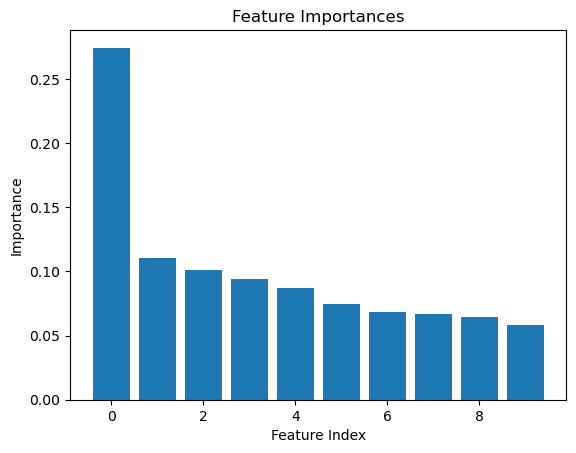

In [64]:
import matplotlib.pyplot as plt
import numpy as np

feature_importances = model_rfe.feature_importances_
sorted_idx = np.argsort(feature_importances)[::-1]

plt.bar(range(len(sorted_idx)), feature_importances[sorted_idx])
plt.xlabel("Feature Index")
plt.ylabel("Importance")
plt.title("Feature Importances")
plt.show()


In [65]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(RandomForestRegressor(random_state=42), X_rfe, y, cv=5, scoring='r2')
print("Cross-Validation R-squared:", scores.mean())


Cross-Validation R-squared: 0.6049706698055808


In [66]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

print("Ridge Test R-squared:", r2_score(y_test, y_pred_ridge))


Ridge Test R-squared: 0.6607749866451438


In [67]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

print("Ridge Test R-squared:", r2_score(y_test, y_pred_ridge))


Ridge Test R-squared: 0.6607749866451438


In [57]:
!pip install xgboost

from xgboost import XGBRegressor

# Train XGBoost model
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
xgb.fit(X_train, y_train)

# Evaluate
y_pred_xgb = xgb.predict(X_test)
print("R-squared with XGBoost:", r2_score(y_test, y_pred_xgb))


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 750.3 kB/s eta 0:00:00a 0:00:01
R-squared with XGBoost: 0.6014902022032629


In [59]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np

# Ensure X and y are correctly defined
X = ranked_players.drop(columns=["FotMob Rating", "Player", "Country", "Team"])  # Drop non-numeric and target
y = ranked_players["FotMob Rating"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Store R^2 scores for comparison
model_scores = {}

# 1. Linear Regression (Base Model)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
model_scores["Linear Regression"] = r2_score(y_test, y_pred_lr)

# 2. Polynomial Regression
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
lr_poly = LinearRegression()
lr_poly.fit(X_train_poly, y_train)
y_pred_poly = lr_poly.predict(X_test_poly)
model_scores["Polynomial Regression"] = r2_score(y_test, y_pred_poly)

# 3. Random Forest Regressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
model_scores["Random Forest"] = r2_score(y_test, y_pred_rf)

# 4. Gradient Boosting Regressor
gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
model_scores["Gradient Boosting"] = r2_score(y_test, y_pred_gb)

# 5. XGBoost
xgb = XGBRegressor(random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
model_scores["XGBoost"] = r2_score(y_test, y_pred_xgb)

# 6. Stacking Regressor
stack = StackingRegressor(
    estimators=[('gb', gb), ('ada', AdaBoostRegressor(random_state=42))],
    final_estimator=LinearRegression()
)
stack.fit(X_train, y_train)
y_pred_stack = stack.predict(X_test)
model_scores["Stacking Regressor"] = r2_score(y_test, y_pred_stack)

# 7. Recursive Feature Elimination (RFE) with Random Forest
rfe = RFE(estimator=rf, n_features_to_select=10)
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)
rf_rfe = RandomForestRegressor(random_state=42)
rf_rfe.fit(X_train_rfe, y_train)
y_pred_rfe = rf_rfe.predict(X_test_rfe)
model_scores["RFE + Random Forest"] = r2_score(y_test, y_pred_rfe)

# 8. Scaled Gradient Boosting
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', GradientBoostingRegressor(random_state=42))
])
pipeline.fit(X_train, y_train)
y_pred_scaled = pipeline.predict(X_test)
model_scores["Scaled Gradient Boosting"] = r2_score(y_test, y_pred_scaled)

# Print all R^2 scores for comparison
for model, score in model_scores.items():
    print(f"{model}: R^2 = {score:.4f}")


Linear Regression: R^2 = 0.6634
Polynomial Regression: R^2 = -2.9747
Random Forest: R^2 = 0.5438
Gradient Boosting: R^2 = 0.5738
XGBoost: R^2 = 0.4853
Stacking Regressor: R^2 = 0.5700
RFE + Random Forest: R^2 = 0.5531
Scaled Gradient Boosting: R^2 = 0.5706


In [58]:
import numpy as np

# Calculate correlation matrix
corr_matrix = X.corr()

# Identify highly correlated features
high_corr = [column for column in corr_matrix.columns if any(abs(corr_matrix[column]) > 0.9)]

# Drop highly correlated features
X_reduced = X.drop(columns=high_corr)

# Train and evaluate
model_reduced = RandomForestRegressor(random_state=42)
model_reduced.fit(X_reduced, y)
y_pred_reduced = model_reduced.predict(X_reduced)

print("R-squared with Reduced Features:", r2_score(y, y_pred_reduced))


ValueError: at least one array or dtype is required